# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Kellie Heckman https://github.com/krh5284/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [76]:
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from selenium import webdriver
import time
import nltk

Question 1 code

In [77]:
# using Selenium to open the webpage in the same way that a broswer does to combat cookies
driver = webdriver.Chrome()
url = 'https://www.gislounge.com/python-and-gis-resources/'
driver.maximize_window()
driver.get(url)

# setting a sleep time so that all elements load after catching them
time.sleep(5)
content = driver.page_source.encode('utf-8').strip()

# dumping into a .pkl
with open('content.pkl', 'wb') as file:
    pickle.dump(content, file)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

Question 2 polarity

In [78]:
# loading trained pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# opening the .pkl
with open('content.pkl', 'rb') as file:
    code = pickle.load(file)

# parsing the code using html5lib
soup = BeautifulSoup(code, 'html5lib')

# limiting to just the <div where class = 'entry-content'
txt = soup.find('div', class_='entry-content')

# running txt thru the pipeline
blob = nlp(txt.get_text())
print('Polarity of the article is', blob._.blob.polarity)

Polarity of the article is 0.1336239950525665


Question 2 sentence count

In [81]:
# counting the number of sentences in the article
sentence_count = len([token for token in txt])

print('Number of sentences is', sentence_count)


Number of sentences is 64


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

Question 3 code

In [83]:
# make all lower case and remove punctuation, stopwords, and whitespace
important_tokens = [token.text.lower() for token in blob if not token.is_punct and not token.is_stop and not token.is_space]

# counting the tokens and returning the 5 most frequent
count = Counter(important_tokens)
top5 = count.most_common(5)

print('5 most frequent tokens and their count', top5)

5 most frequent tokens and their count [('python', 51), ('gis', 15), ('qgis', 9), ('window', 9), ('arcgis', 8)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

Question 4 code

In [84]:
# the same process as question 3 but with lemmas
important_lemmas = [token.lemma_.lower() for token in blob if not token.is_punct and not token.is_stop and not token.is_space]

lemma_count = Counter(important_lemmas)
top5_lemma = lemma_count.most_common(5)

print('5 most frequent lemmas and their count',top5_lemma)

5 most frequent lemmas and their count [('python', 51), ('gis', 15), ('script', 13), ('qgis', 9), ('window', 9)]


User defined functions for questions 5 and 6

In [110]:
# def function for score_sentence_by_token
def score_sentence_by_token(sentence, interesting_token):
    # counting the number of tokens
    token_count = len([token for token in sentence])
    #counting the number of tokens in important_tokens
    interesting_token = len(important_tokens)
    # dividing interesting_token by token_count
    token_score = interesting_token / token_count
    return token_score


# the same process as score_sentence_by_token but with lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemma_count = len([lemma for lemma in sentence])
    interesting_lemmas = len(important_lemmas)
    lemma_score = interesting_lemmas / lemma_count
    return lemma_score

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Quesiton 5 code

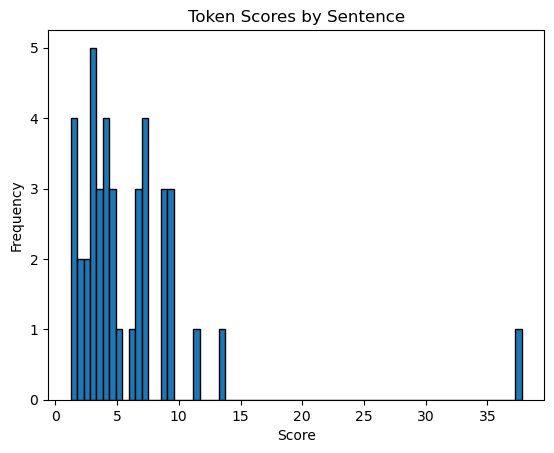

In [134]:
sentences = [sent.text for sent in blob.sents]
sentence_by_tokens = []

for sentence in sentences:
    score = score_sentence_by_token(sentence, important_tokens)
    sentence_by_tokens.append(score)


plt.hist(sentence_by_tokens, bins=70, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Token Scores by Sentence')
plt.show()


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Question 6 code

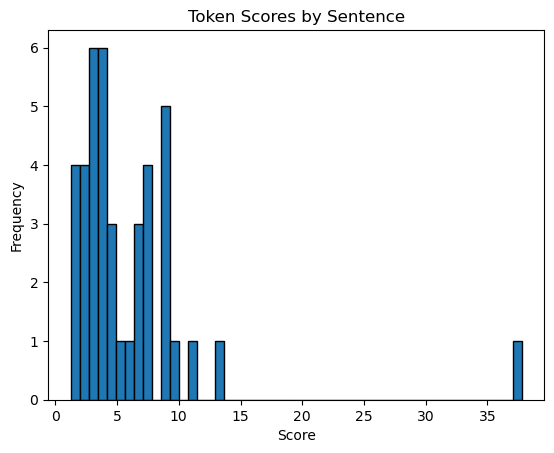

In [133]:
sentences = [sent.text for sent in blob.sents]
sentence_by_lemma = []

for sentence in sentences:
    score = score_sentence_by_lemma(sentence, important_lemmas)
    sentence_by_lemma.append(score)

plt.hist(sentence_by_lemma, bins=50, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Token Scores by Sentence')
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 8
* Cutoff Score (lemmas): 7

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [141]:
sentences = [sent.text for sent in blob.sents]
sentence_list = []

for sentence in sentences:
    score = score_sentence_by_token(sentence, important_tokens)
    if score > 8:
        sentence_list.append(sentence)
print(sentence_list)

['Python files are denoted with the .py file extension.\n', 'By clicking the button, ArcMap’s python window opens.\xa0 ', 'Click the “open” button to add the script to the window.\n', 'IDE stands for Integrated Development Environment.\xa0 ', 'Geopy\nGeocoding toolbox for Python. \xa0', 'Provides support for six geocoders:\xa0Google Maps, Yahoo!', 'Open source.\n', 'Python and GIS 101\nFrom Sean Giles’ blog.\n\n', 'Also contains links to Python examples and resources.\n']


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?